In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


# Total Trips

In [8]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,334,632","19,170,463"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,419,921","11,919,017"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.15     34.34      0.00
           survey      3.72     21.41      0.22
HOV2       model       9.20     21.18      0.00
           survey      5.82     19.58      0.42
HOV3+      model       9.46     21.50      0.00
           survey      7.10     17.75      0.24
SOV        model       9.38     22.00      0.00
           survey      7.67     19.35      0.17
School Bus model       3.20     10.66      0.00
           survey      4.71     12.45      0.00
TNC        model       2.19     10.01      0.00
           survey      4.12     17.23      0.45
Transit    model      10.80     43.54      0.00
           survey      6.46     30.50      2.30
Walk       model       0.68     13.61      0.00
           survey      1.61     17.39      0.20

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.85     19.00      0.00
           survey      2.90     15.89      0.00
HOV2       model       3.25     10.54      0.00
           survey      3.68     11.98      0.18
HOV3+      model       3.39     10.80      0.00
           survey      4.19     12.95      0.02
SOV        model       6.13     15.86      0.00
           survey      5.73     16.92      0.10
School Bus model       3.14     10.41      0.00
           survey      2.21      8.58      0.05
TNC        model       2.35      9.28      0.00
           survey      2.71     13.03      0.43
Transit    model       5.95     36.50      0.00
           survey      4.36     18.41      1.98
Walk       model       1.35     26.93      0.00
           survey      1.19     14.55      0.22

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,285,447","3,264,963"
1,"767,707","786,285"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,060","9,796"
Full-Time Worker,"492,529","709,233"
High School Student Age 16+,"128,405","5,549"
Non-Working Adult Age 65+,499,329
Non-Working Adult Age <65,"18,064",NaN
Part-Time Worker,"42,133","44,097"
University Student,"84,017","15,414"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"105,124","128,071"
1.0,"481,486","512,078"
2.0,"575,088","620,394"
3+,"419,855","377,345"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   51,181   22,464   11,159    3,433  16,874
       survey  62,425   27,901   17,279        0  20,465
1.0    model  115,121  105,092   80,918   29,215 151,052
       survey 138,715  102,527  110,953        0 159,884
2.0    model   31,797   57,388   76,209   37,788 371,898
       survey  90,479   83,871   75,214        0 370,829
3.0    model    8,060   16,149   29,831   16,094 221,610
       survey  46,620   19,428   22,998        0 175,287
4+     model    3,244    6,766   10,882    5,716 101,494
       survey   6,152      486   13,427        0  92,947

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

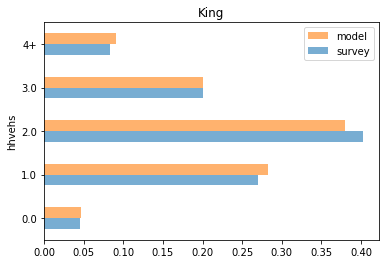

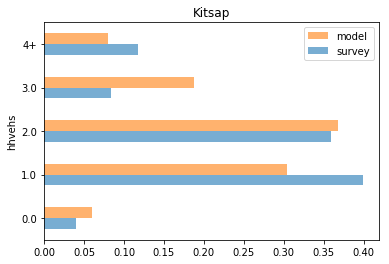

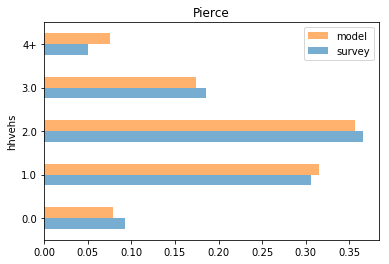

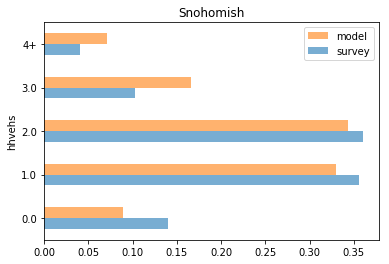

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County     King Kitsap  Pierce Snohomish
Home County                                  
King         438,444 33,537  94,999   150,603
Kitsap        13,177 30,281  49,693    91,164
Pierce        41,663 43,972 160,882   212,159
Snohomish     31,157 49,993 125,864   266,571